In [1]:
import time
import gym
import random
import numpy as np
from statistics import mean, median
from collections import Counter
from functools import reduce
from tqdm import tqdm
import matplotlib.pyplot as plt

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [26]:
env = gym.make('CartPole-v0')
env.reset();

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [6]:
def run_episode(env, parameters):  
    observation = env.reset()
    totalreward = 0
    for _ in range(200):
        action = 0 if np.matmul(parameters,observation) < 0 else 1
        observation, reward, done, info = env.step(action)
        totalreward += reward
        if done:
            break
    return totalreward

In [17]:
def random_search():
    bestparams = None  
    bestreward = 0  
    for step in range(10000):  
        parameters = np.random.rand(4) * 2 - 1
        reward = run_episode(env,parameters)
        if reward > bestreward:
            bestreward = reward
            bestparams = parameters
            # considered solved if the agent lasts 200 timesteps
            if reward == 200:
                break
    # return how long it took                
    return step

In [21]:
scores = []
for _ in range(1000):
    scores.append(random_search())


mean 12.867 median 8.0 max 118


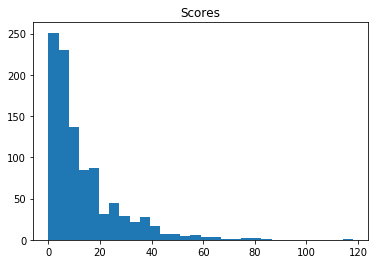

In [23]:
plt.hist(scores, bins=30)
plt.title('Scores')
print('mean', mean(scores), 'median', median(scores), 'max', np.max(scores))

# Done
Randomly searching for a linear function that can balance the pole works quite well.